In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import math
import psycopg2 as psy
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
import pandas.io.sql as psql
%matplotlib inline


In [ ]:
~/Desktop/capstone_clean_data/cohort1_baseline.csv

In [19]:
demo_bl = pd.read_csv('~/Desktop/capstone_clean_data/cohort1_baseline.csv')
demo_bl.AgeMP.value_counts()

/Users/cguy/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


17    7924
16    5756
19      83
18       7
20       3
15       1
14       1
Name: AgeMP, dtype: int64

In [20]:
demo_bl.head()

,Unnamed: 0,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
0,0,Wave 1: Age 17 Baseline Survey,AK450290395006,201103,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,...,0,0,0,0,0,0,1,1,1,17
1,2,Wave 1: Age 17 Baseline Survey,AK450448396586,201103,Youth participated,2010-12-28,"Yes, is in FC on Date",No,No,Yes,...,0,0,0,0,0,0,1,3,3,17
2,4,Wave 1: Age 17 Baseline Survey,AK450461296715,201103,Not in sample,NaN,"Yes, is in FC on Date","Yes, employed full time","Yes, employed part time",Yes,...,0,0,0,0,0,0,1,1,1,17
3,5,Wave 1: Age 17 Baseline Survey,AK450540097503,201103,Youth participated,2010-10-13,"Yes, is in FC on Date",No,"Yes, employed part time",No,...,0,0,0,0,0,1,1,1,1,17
4,7,Wave 1: Age 17 Baseline Survey,AK450652098623,201103,Youth participated,2011-03-17,"Yes, is in FC on Date",No,No,Yes,...,0,0,0,0,0,0,0,1,1,17


In [13]:
connection = psy.connect("dbname=nytd_clean_data user=cguy")

cohort_1 = psql.read_sql("SELECT * FROM cohort_1", connection)

In [14]:
cohort_1 = cohort_1.drop('index',axis=1)
cohort_1.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
0,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
1,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
2,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
3,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
4,Wave 1: Age 17 Baseline Survey,AK450448396586,2011-03-01,Youth participated,2010-12-28,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,3,3,17


In [4]:
cohort_2.dtypes

wave                        object
RepDate_outcomes    datetime64[ns]
outcmrpt                    object
outcmdte            datetime64[ns]
outcmfcs                    object
currfte                     object
currpte                     object
emplysklls                  object
socsecrty                   object
educaid                     object
pubfinas                    object
pubfoodas                   object
pubhousas                   object
othrfinas                   object
highedcert                  object
currenroll                  object
cnctadult                   object
homeless                    object
subabuse                    object
incarc                      object
children                    object
marriage                    object
medicaid                    object
othrhlthin                  object
medicalin                   object
mentlhlthin                 object
prescripin                  object
baseline                    object
fy14cohort          

# Distribution of Demographics

In [21]:
demographics_bl = demo_bl[['St','DelinqntSv','Sex','Race','TribeSv','EdLevlSv','SpecEdSv','RaceEthn','AgeMP']]

In [22]:
demographics_bl.AgeMP.value_counts()

17    7924
16    5756
19      83
18       7
20       3
15       1
14       1
Name: AgeMP, dtype: int64

In [9]:
# Sample stratified by state

In [23]:
state_density_c2 = demographics_bl.St.value_counts()

state_density_c2 = state_density_c2.to_frame()
state_density_c2.reset_index(inplace=True)
state_density_c2.columns = ['State', 'Count_FosterYouth']

# Need to add state name to dataframe. Will use library for dictionary...

import us

def add_st_name(data_abbr):
    state_dict = us.states.mapping('abbr', 'name')
    name = state_dict.get(data_abbr, None)
    return name

state_density_c2['st_name'] = state_density_c2.State.apply(add_st_name)
    
state_density_c2 = state_density_c2.set_index(['State'])
state_density_c2

,Count_FosterYouth,st_name
State,,
CA,3526,California
NY,1878,New York
WI,662,Wisconsin
FL,606,Florida
IA,521,Iowa
GA,486,Georgia
MO,445,Missouri
LA,372,Louisiana
MI,371,Michigan


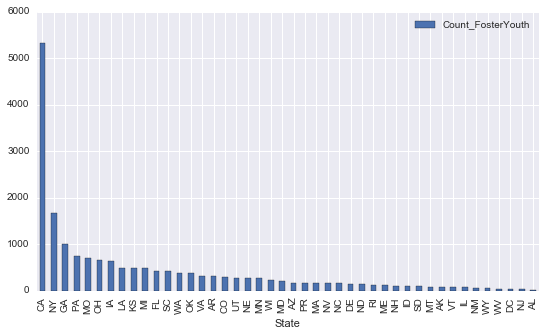

In [11]:
state_density_c2.plot(kind='bar', figsize=(9,5))

In [6]:
cohort_2.wave.value_counts()

Age 17 Baseline Survey    18253
Name: wave, dtype: int64

In [8]:
demographics = cohort_2[['St','DelinqntSv','Sex','Race','TribeSv','EdLevlSv','SpecEdSv','RaceEthn','AgeMP']]

def graph_demos(column, figsize_i=(6,6)):
    dist = demographics[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of Wave 1:" + str(column), figsize=figsize_i)
    
demographics.describe(include='all')

,St,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP
count,18253,18253.000000,18253.000000,18253.000000,18253.000000,18253.000000,18253.00000,18253.000000,18253.000000
unique,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.533282,1.505122,11.610146,0.794719,11.492357,0.39966,3.912781,16.545992
std,NaN,5.120480,0.499987,29.305791,7.649603,10.829922,3.33783,9.303250,0.499322
min,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,16.000000
25%,NaN,0.000000,1.000000,1.000000,0.000000,9.000000,0.00000,1.000000,16.000000
50%,NaN,0.000000,2.000000,2.000000,0.000000,10.000000,0.00000,2.000000,17.000000
75%,NaN,0.000000,2.000000,2.000000,0.000000,11.000000,1.00000,6.000000,17.000000


,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP
St,,,,,,,,
AK,79,79,79,79,79,79,79,79
AL,5,5,5,5,5,5,5,5
AR,309,309,309,309,309,309,309,309
AZ,171,171,171,171,171,171,171,171
CA,5336,5336,5336,5336,5336,5336,5336,5336
CO,303,303,303,303,303,303,303,303
DC,38,38,38,38,38,38,38,38
DE,143,143,143,143,143,143,143,143
FL,429,429,429,429,429,429,429,429


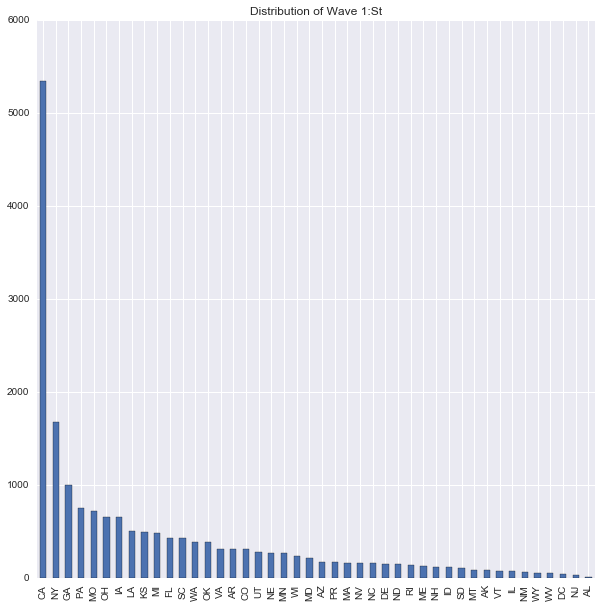

In [9]:
graph_demos('St',(10,10))
demographics.groupby(['St']).count()

,St,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP
DelinqntSv,,,,,,,,
0,14675,14675,14675,14675,14675,14675,14675,14675
1,3497,3497,3497,3497,3497,3497,3497,3497
77,81,81,81,81,81,81,81,81


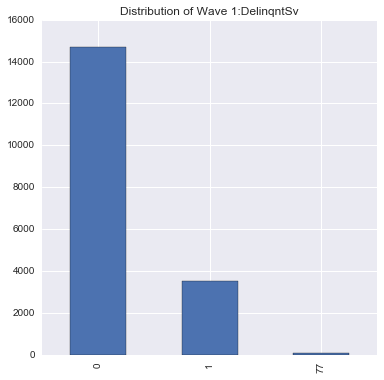

In [10]:
graph_demos('DelinqntSv')
demographics.groupby(['DelinqntSv']).count()

,St,DelinqntSv,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP
Sex,,,,,,,,
1,9033,9033,9033,9033,9033,9033,9033,9033
2,9220,9220,9220,9220,9220,9220,9220,9220


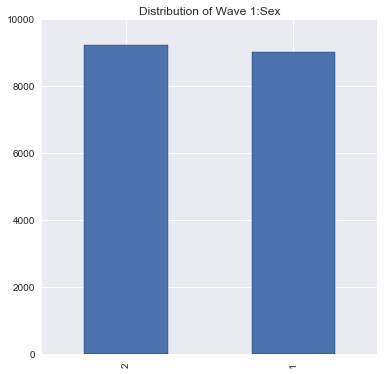

In [11]:
graph_demos('Sex')
demographics.groupby(['Sex']).count()

,St,DelinqntSv,Sex,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP
Race,,,,,,,,
1,8964,8964,8964,8964,8964,8964,8964,8964
2,5629,5629,5629,5629,5629,5629,5629,5629
3,380,380,380,380,380,380,380,380
4,187,187,187,187,187,187,187,187
5,54,54,54,54,54,54,54,54
6,1197,1197,1197,1197,1197,1197,1197,1197
99,1842,1842,1842,1842,1842,1842,1842,1842


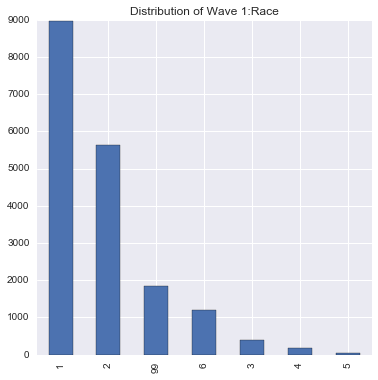

In [12]:
graph_demos('Race')
demographics.groupby(['Race']).count()

,St,DelinqntSv,Sex,Race,EdLevlSv,SpecEdSv,RaceEthn,AgeMP
TribeSv,,,,,,,,
0,17579,17579,17579,17579,17579,17579,17579,17579
1,492,492,492,492,492,492,492,492
77,182,182,182,182,182,182,182,182


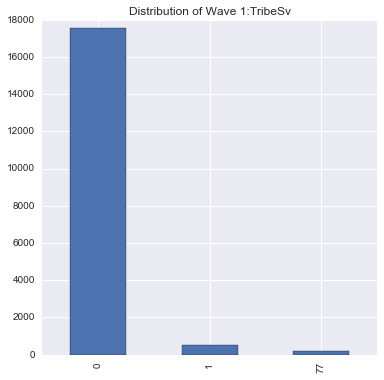

In [13]:
graph_demos('TribeSv')
demographics.groupby(['TribeSv']).count()

,St,DelinqntSv,Sex,Race,TribeSv,SpecEdSv,RaceEthn,AgeMP
EdLevlSv,,,,,,,,
0,145,145,145,145,145,145,145,145
6,122,122,122,122,122,122,122,122
7,379,379,379,379,379,379,379,379
8,1731,1731,1731,1731,1731,1731,1731,1731
9,4207,4207,4207,4207,4207,4207,4207,4207
10,6432,6432,6432,6432,6432,6432,6432,6432
11,3712,3712,3712,3712,3712,3712,3712,3712
12,902,902,902,902,902,902,902,902
13,75,75,75,75,75,75,75,75


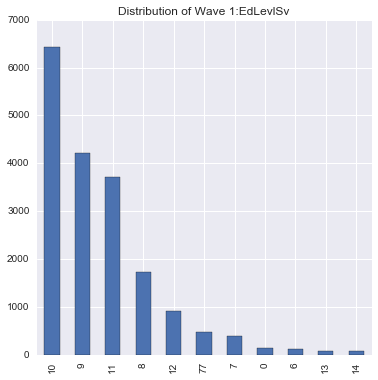

In [14]:
graph_demos('EdLevlSv')
demographics.groupby(['EdLevlSv']).count()

,St,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,RaceEthn,AgeMP
SpecEdSv,,,,,,,,
0,13542,13542,13542,13542,13542,13542,13542,13542
1,4677,4677,4677,4677,4677,4677,4677,4677
77,34,34,34,34,34,34,34,34


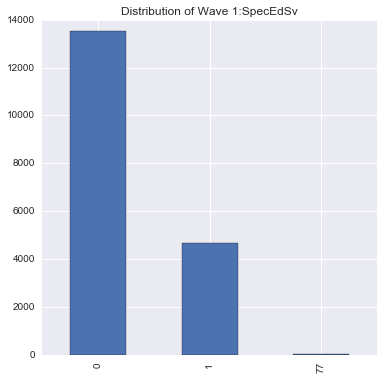

In [15]:
graph_demos('SpecEdSv')
demographics.groupby(['SpecEdSv']).count()

,St,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,AgeMP
RaceEthn,,,,,,,,
1,6936,6936,6936,6936,6936,6936,6936,6936
2,5352,5352,5352,5352,5352,5352,5352,5352
3,305,305,305,305,305,305,305,305
4,159,159,159,159,159,159,159,159
5,43,43,43,43,43,43,43,43
6,1004,1004,1004,1004,1004,1004,1004,1004
7,4293,4293,4293,4293,4293,4293,4293,4293
99,161,161,161,161,161,161,161,161


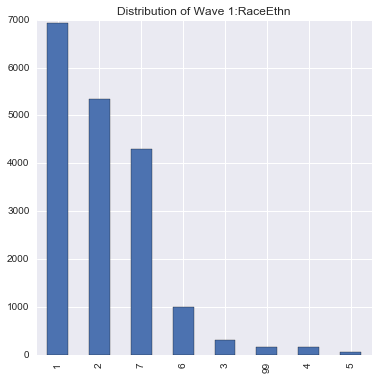

In [16]:
graph_demos('RaceEthn')
demographics.groupby(['RaceEthn']).count()

,St,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn
AgeMP,,,,,,,,
16,8293,8293,8293,8293,8293,8293,8293,8293
17,9958,9958,9958,9958,9958,9958,9958,9958
19,1,1,1,1,1,1,1,1
21,1,1,1,1,1,1,1,1


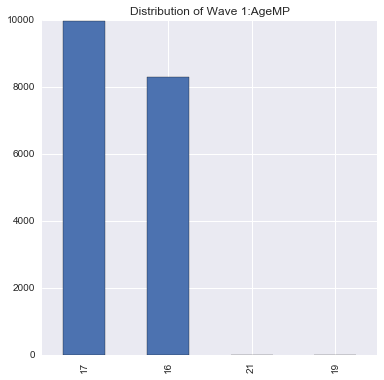

In [17]:
graph_demos('AgeMP')
demographics.groupby(['AgeMP']).count()

____________________________________________________________________________________________________________

# Distributions of Services

In [19]:
services = cohort_2[['ILNAsv','AcSuppSv','PSEdSuppSv','CareerSv','EmplyTrSv','BudgetSv','HousEdSv','HlthEdSv',\
                     'FamSuppSv','MentorSv','SILsv','RmBrdFASv','EducFinaSv','OthrFinaSv']]

services.describe(include='all')

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv
count,18253.000000,18253.000000,18253.000000,18253.000000,18253.000000,18253.000000,18253.000000,18253.000000,18253.000000,18253.000000,18253.000000,18253.000000,18253.000000,18253.000000
mean,0.537391,0.576015,0.214869,0.378239,0.239084,0.360489,0.382458,0.395168,0.311620,0.231688,0.082562,0.103052,0.133622,0.246699
std,1.473889,1.472403,1.446528,1.469327,1.451092,1.467748,1.469670,1.470632,1.462279,1.449742,0.629581,1.419919,1.428113,1.452440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000


,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv
ILNAsv,,,,,,,,,,,,,
0,8900,8900,8900,8900,8900,8900,8900,8900,8900,8900,8900,8900,8900
1,9347,9347,9347,9347,9347,9347,9347,9347,9347,9347,9347,9347,9347
77,6,6,6,6,6,6,6,6,6,6,6,6,6


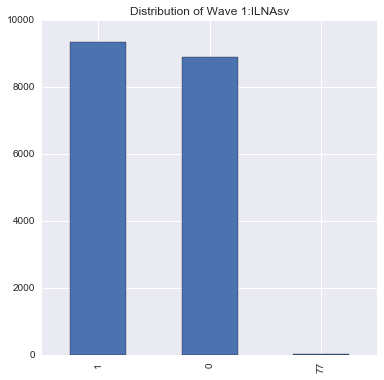

In [22]:
def graph_serv(column):
    dist = services[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of " + str(column), figsize=(6,6))

def graph_serv(column, figsize_i=(6,6)):
    dist = services[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of Wave 1:" + str(column), figsize=figsize_i)
    
    
graph_serv('ILNAsv')
services.groupby(['ILNAsv']).count()

,ILNAsv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv
AcSuppSv,,,,,,,,,,,,,
0,8195,8195,8195,8195,8195,8195,8195,8195,8195,8195,8195,8195,8195
1,10052,10052,10052,10052,10052,10052,10052,10052,10052,10052,10052,10052,10052
77,6,6,6,6,6,6,6,6,6,6,6,6,6


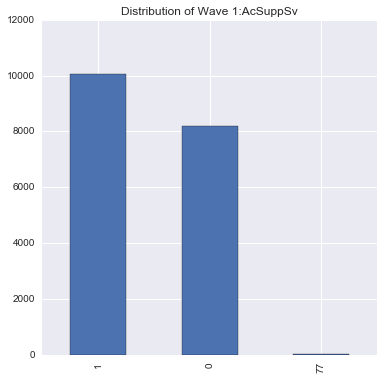

In [23]:
graph_serv('AcSuppSv')
services.groupby(['AcSuppSv']).count()

,ILNAsv,AcSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv
PSEdSuppSv,,,,,,,,,,,,,
0,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787
1,3460,3460,3460,3460,3460,3460,3460,3460,3460,3460,3460,3460,3460
77,6,6,6,6,6,6,6,6,6,6,6,6,6


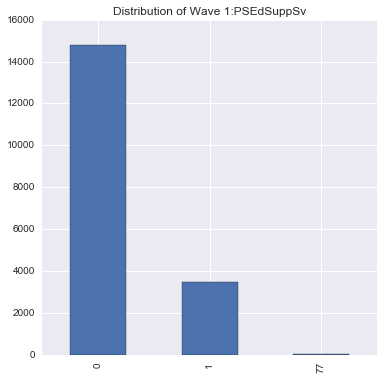

In [24]:
graph_serv('PSEdSuppSv')
services.groupby(['PSEdSuppSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv
CareerSv,,,,,,,,,,,,,
0,11805,11805,11805,11805,11805,11805,11805,11805,11805,11805,11805,11805,11805
1,6442,6442,6442,6442,6442,6442,6442,6442,6442,6442,6442,6442,6442
77,6,6,6,6,6,6,6,6,6,6,6,6,6


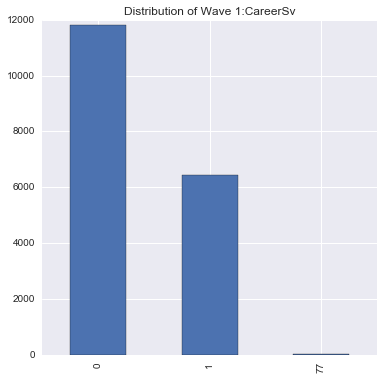

In [25]:
graph_serv('CareerSv')
services.groupby(['CareerSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv
EmplyTrSv,,,,,,,,,,,,,
0,14345,14345,14345,14345,14345,14345,14345,14345,14345,14345,14345,14345,14345
1,3902,3902,3902,3902,3902,3902,3902,3902,3902,3902,3902,3902,3902
77,6,6,6,6,6,6,6,6,6,6,6,6,6


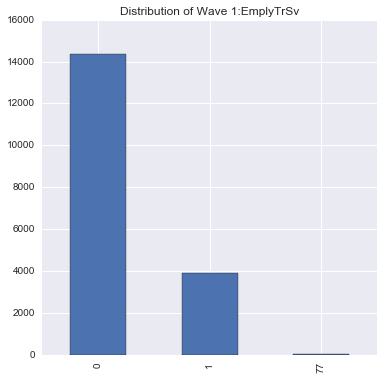

In [26]:
graph_serv('EmplyTrSv')
services.groupby(['EmplyTrSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv
BudgetSv,,,,,,,,,,,,,
0,12129,12129,12129,12129,12129,12129,12129,12129,12129,12129,12129,12129,12129
1,6118,6118,6118,6118,6118,6118,6118,6118,6118,6118,6118,6118,6118
77,6,6,6,6,6,6,6,6,6,6,6,6,6


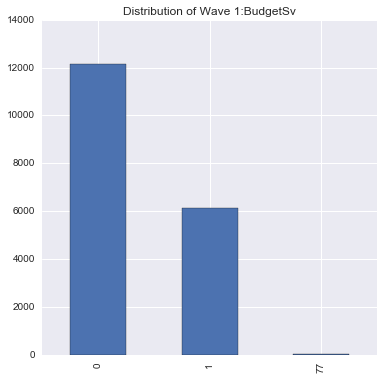

In [27]:
graph_serv('BudgetSv')
services.groupby(['BudgetSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv
HousEdSv,,,,,,,,,,,,,
0,11728,11728,11728,11728,11728,11728,11728,11728,11728,11728,11728,11728,11728
1,6519,6519,6519,6519,6519,6519,6519,6519,6519,6519,6519,6519,6519
77,6,6,6,6,6,6,6,6,6,6,6,6,6


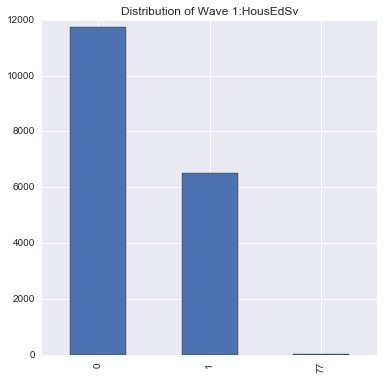

In [28]:
graph_serv('HousEdSv')
services.groupby(['HousEdSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv
HlthEdSv,,,,,,,,,,,,,
0,11496,11496,11496,11496,11496,11496,11496,11496,11496,11496,11496,11496,11496
1,6751,6751,6751,6751,6751,6751,6751,6751,6751,6751,6751,6751,6751
77,6,6,6,6,6,6,6,6,6,6,6,6,6


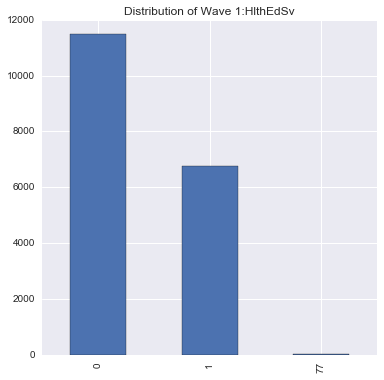

In [29]:
graph_serv('HlthEdSv')
services.groupby(['HlthEdSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv
FamSuppSv,,,,,,,,,,,,,
0,13021,13021,13021,13021,13021,13021,13021,13021,13021,13021,13021,13021,13021
1,5226,5226,5226,5226,5226,5226,5226,5226,5226,5226,5226,5226,5226
77,6,6,6,6,6,6,6,6,6,6,6,6,6


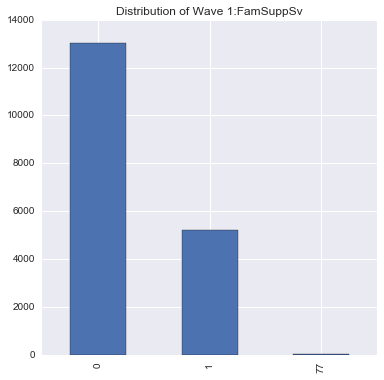

In [30]:
graph_serv('FamSuppSv')
services.groupby(['FamSuppSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv
MentorSv,,,,,,,,,,,,,
0,14480,14480,14480,14480,14480,14480,14480,14480,14480,14480,14480,14480,14480
1,3767,3767,3767,3767,3767,3767,3767,3767,3767,3767,3767,3767,3767
77,6,6,6,6,6,6,6,6,6,6,6,6,6


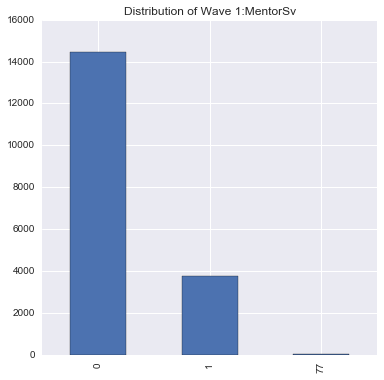

In [31]:
graph_serv('MentorSv')
services.groupby(['MentorSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,RmBrdFASv,EducFinaSv,OthrFinaSv
SILsv,,,,,,,,,,,,,
0,16822,16822,16822,16822,16822,16822,16822,16822,16822,16822,16822,16822,16822
1,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430
77,1,1,1,1,1,1,1,1,1,1,1,1,1


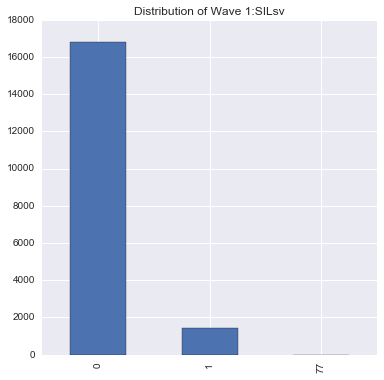

In [32]:
graph_serv('SILsv')
services.groupby(['SILsv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,EducFinaSv,OthrFinaSv
RmBrdFASv,,,,,,,,,,,,,
0,16828,16828,16828,16828,16828,16828,16828,16828,16828,16828,16828,16828,16828
1,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419
77,6,6,6,6,6,6,6,6,6,6,6,6,6


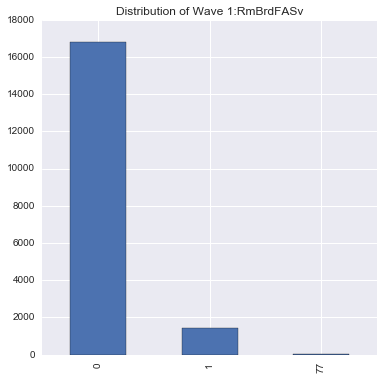

In [33]:
graph_serv('RmBrdFASv')
services.groupby(['RmBrdFASv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,OthrFinaSv
EducFinaSv,,,,,,,,,,,,,
0,16270,16270,16270,16270,16270,16270,16270,16270,16270,16270,16270,16270,16270
1,1977,1977,1977,1977,1977,1977,1977,1977,1977,1977,1977,1977,1977
77,6,6,6,6,6,6,6,6,6,6,6,6,6


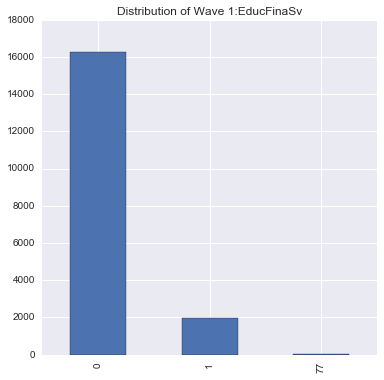

In [34]:
graph_serv('EducFinaSv')
services.groupby(['EducFinaSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv
OthrFinaSv,,,,,,,,,,,,,
0,14206,14206,14206,14206,14206,14206,14206,14206,14206,14206,14206,14206,14206
1,4041,4041,4041,4041,4041,4041,4041,4041,4041,4041,4041,4041,4041
77,6,6,6,6,6,6,6,6,6,6,6,6,6


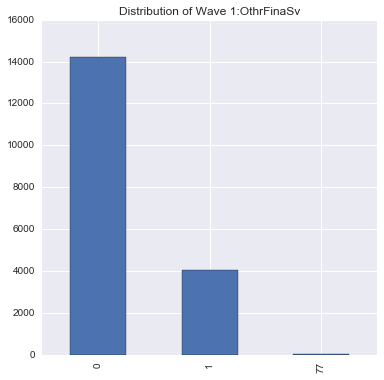

In [35]:
graph_serv('OthrFinaSv')
services.groupby(['OthrFinaSv']).count()

____________________________________________________________________________________________________________

# Distributions of Outcomes

In [36]:
outcomes = cohort_2[['pubfoodas','pubhousas','othrfinas','highedcert','currfte','currpte','emplysklls','socsecrty',\
                     'educaid','pubfinas','currenroll','cnctadult','prescripin','homeless','subabuse','incarc',\
                     'children','marriage','medicaid','othrhlthin','medicalin','mentlhlthin']]

outcomes.describe(include='all')

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,...,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
count,18253,18253,18253,18253,18253,18253,18253,18253,18253,18253,...,18253,18253,18253,18253,18253,18253,18253,18253,18253,18253
unique,5,5,4,9,4,4,4,4,4,5,...,6,4,4,4,4,5,5,5,6,6
top,not applicable,not applicable,no,none of the above,no,no,no,no,no,not applicable,...,not applicable,no,no,no,no,not applicable,yes,no,not applicable,not applicable
freq,11942,11942,12661,13041,13941,12193,10844,12296,13682,11903,...,12491,11551,10277,9620,13408,13664,12215,9984,12177,12489


In [37]:
def graph_outcm(column, figsize_i=(6,6)):
    dist = outcomes[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of Wave 1:" + str(column), figsize=figsize_i)


,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,currenroll,...,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
pubfoodas,,,,,,,,,,,,,,,,,,,,,
blank,4469,4469,4469,4469,4469,4469,4469,4469,4469,4469,...,4469,4469,4469,4469,4469,4469,4469,4469,4469,4469
declined,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
no,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566,...,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566
not applicable,11942,11942,11942,11942,11942,11942,11942,11942,11942,11942,...,11942,11942,11942,11942,11942,11942,11942,11942,11942,11942
yes,258,258,258,258,258,258,258,258,258,258,...,258,258,258,258,258,258,258,258,258,258


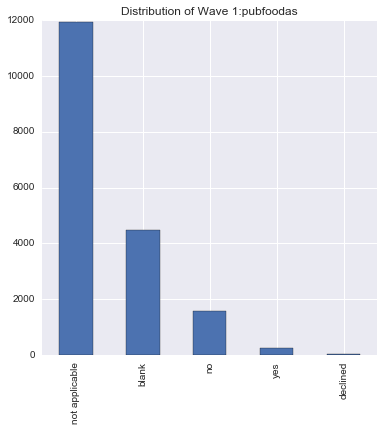

In [39]:
graph_outcm('pubfoodas')
outcomes.groupby(['pubfoodas']).count()

,pubfoodas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,currenroll,...,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
pubhousas,,,,,,,,,,,,,,,,,,,,,
blank,4463,4463,4463,4463,4463,4463,4463,4463,4463,4463,...,4463,4463,4463,4463,4463,4463,4463,4463,4463,4463
declined,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
no,1789,1789,1789,1789,1789,1789,1789,1789,1789,1789,...,1789,1789,1789,1789,1789,1789,1789,1789,1789,1789
not applicable,11942,11942,11942,11942,11942,11942,11942,11942,11942,11942,...,11942,11942,11942,11942,11942,11942,11942,11942,11942,11942
yes,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35


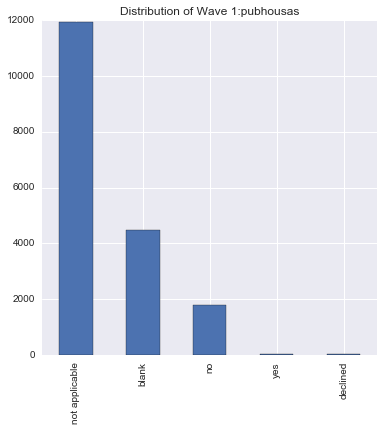

In [40]:
graph_outcm('pubhousas')
outcomes.groupby(['pubhousas']).count()

,pubfoodas,pubhousas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,currenroll,...,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
othrfinas,,,,,,,,,,,,,,,,,,,,,
blank,3989,3989,3989,3989,3989,3989,3989,3989,3989,3989,...,3989,3989,3989,3989,3989,3989,3989,3989,3989,3989
declined,303,303,303,303,303,303,303,303,303,303,...,303,303,303,303,303,303,303,303,303,303
no,12661,12661,12661,12661,12661,12661,12661,12661,12661,12661,...,12661,12661,12661,12661,12661,12661,12661,12661,12661,12661
yes,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,...,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300


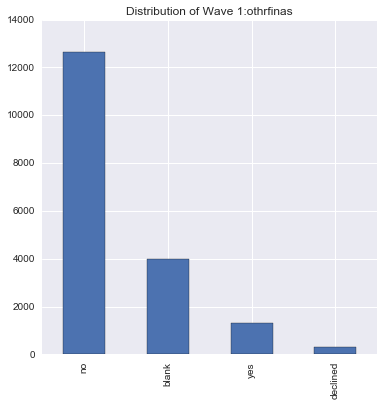

In [41]:
graph_outcm('othrfinas')
outcomes.groupby(['othrfinas']).count()

,pubfoodas,pubhousas,othrfinas,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,currenroll,...,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
highedcert,,,,,,,,,,,,,,,,,,,,,
associate degree,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
bachelor degree,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
blank,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998,...,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998
declined,509,509,509,509,509,509,509,509,509,509,...,509,509,509,509,509,509,509,509,509,509
high school or ged,614,614,614,614,614,614,614,614,614,614,...,614,614,614,614,614,614,614,614,614,614
higher degree,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
none of the above,13041,13041,13041,13041,13041,13041,13041,13041,13041,13041,...,13041,13041,13041,13041,13041,13041,13041,13041,13041,13041
vocational certificate,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
vocational license,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


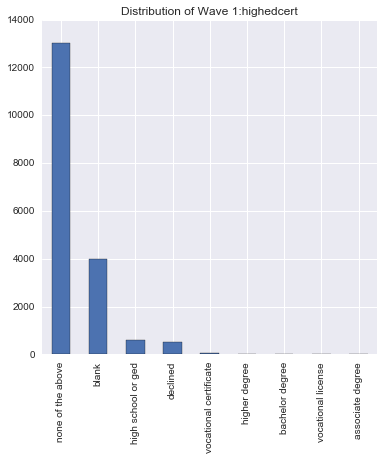

In [42]:
graph_outcm('highedcert')
outcomes.groupby(['highedcert']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currpte,emplysklls,socsecrty,educaid,pubfinas,currenroll,...,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
currfte,,,,,,,,,,,,,,,,,,,,,
blank,3974,3974,3974,3974,3974,3974,3974,3974,3974,3974,...,3974,3974,3974,3974,3974,3974,3974,3974,3974,3974
declined,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
no,13941,13941,13941,13941,13941,13941,13941,13941,13941,13941,...,13941,13941,13941,13941,13941,13941,13941,13941,13941,13941
yes,243,243,243,243,243,243,243,243,243,243,...,243,243,243,243,243,243,243,243,243,243


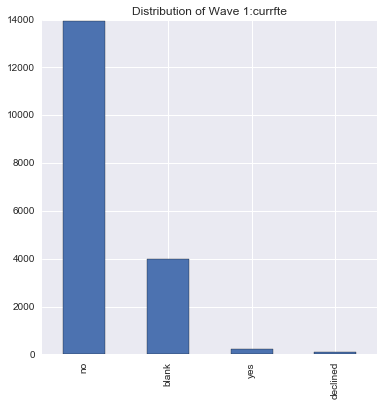

In [43]:
graph_outcm('currfte')
outcomes.groupby(['currfte']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,emplysklls,socsecrty,educaid,pubfinas,currenroll,...,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
currpte,,,,,,,,,,,,,,,,,,,,,
blank,3980,3980,3980,3980,3980,3980,3980,3980,3980,3980,...,3980,3980,3980,3980,3980,3980,3980,3980,3980,3980
declined,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132
no,12193,12193,12193,12193,12193,12193,12193,12193,12193,12193,...,12193,12193,12193,12193,12193,12193,12193,12193,12193,12193
yes,1948,1948,1948,1948,1948,1948,1948,1948,1948,1948,...,1948,1948,1948,1948,1948,1948,1948,1948,1948,1948


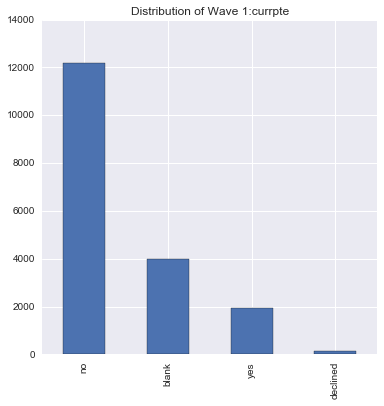

In [44]:
graph_outcm('currpte')
outcomes.groupby(['currpte']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,socsecrty,educaid,pubfinas,currenroll,...,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
emplysklls,,,,,,,,,,,,,,,,,,,,,
blank,4016,4016,4016,4016,4016,4016,4016,4016,4016,4016,...,4016,4016,4016,4016,4016,4016,4016,4016,4016,4016
declined,153,153,153,153,153,153,153,153,153,153,...,153,153,153,153,153,153,153,153,153,153
no,10844,10844,10844,10844,10844,10844,10844,10844,10844,10844,...,10844,10844,10844,10844,10844,10844,10844,10844,10844,10844
yes,3240,3240,3240,3240,3240,3240,3240,3240,3240,3240,...,3240,3240,3240,3240,3240,3240,3240,3240,3240,3240


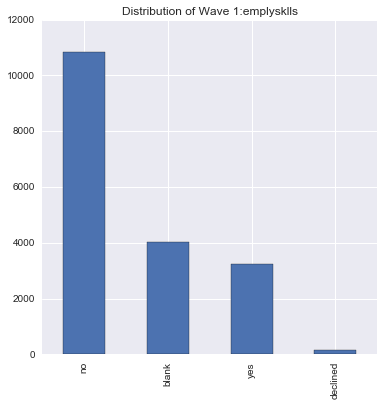

In [45]:
graph_outcm('emplysklls')
outcomes.groupby(['emplysklls']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,educaid,pubfinas,currenroll,...,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
socsecrty,,,,,,,,,,,,,,,,,,,,,
blank,3986,3986,3986,3986,3986,3986,3986,3986,3986,3986,...,3986,3986,3986,3986,3986,3986,3986,3986,3986,3986
declined,446,446,446,446,446,446,446,446,446,446,...,446,446,446,446,446,446,446,446,446,446
no,12296,12296,12296,12296,12296,12296,12296,12296,12296,12296,...,12296,12296,12296,12296,12296,12296,12296,12296,12296,12296
yes,1525,1525,1525,1525,1525,1525,1525,1525,1525,1525,...,1525,1525,1525,1525,1525,1525,1525,1525,1525,1525


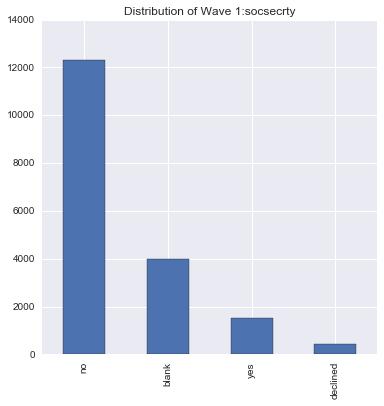

In [46]:
graph_outcm('socsecrty')
outcomes.groupby(['socsecrty']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,pubfinas,currenroll,...,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
educaid,,,,,,,,,,,,,,,,,,,,,
blank,3983,3983,3983,3983,3983,3983,3983,3983,3983,3983,...,3983,3983,3983,3983,3983,3983,3983,3983,3983,3983
declined,223,223,223,223,223,223,223,223,223,223,...,223,223,223,223,223,223,223,223,223,223
no,13682,13682,13682,13682,13682,13682,13682,13682,13682,13682,...,13682,13682,13682,13682,13682,13682,13682,13682,13682,13682
yes,365,365,365,365,365,365,365,365,365,365,...,365,365,365,365,365,365,365,365,365,365


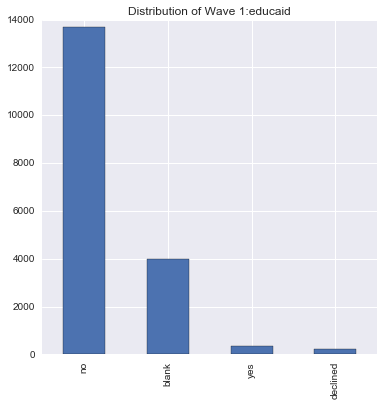

In [47]:
graph_outcm('educaid')
outcomes.groupby(['educaid']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,currenroll,...,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
pubfinas,,,,,,,,,,,,,,,,,,,,,
blank,4498,4498,4498,4498,4498,4498,4498,4498,4498,4498,...,4498,4498,4498,4498,4498,4498,4498,4498,4498,4498
declined,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
no,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,...,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746
not applicable,11903,11903,11903,11903,11903,11903,11903,11903,11903,11903,...,11903,11903,11903,11903,11903,11903,11903,11903,11903,11903
yes,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80


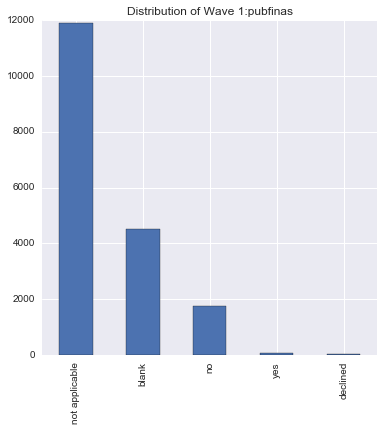

In [48]:
graph_outcm('pubfinas')
outcomes.groupby(['pubfinas']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,...,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
currenroll,,,,,,,,,,,,,,,,,,,,,
blank,3988,3988,3988,3988,3988,3988,3988,3988,3988,3988,...,3988,3988,3988,3988,3988,3988,3988,3988,3988,3988
declined,136,136,136,136,136,136,136,136,136,136,...,136,136,136,136,136,136,136,136,136,136
no,855,855,855,855,855,855,855,855,855,855,...,855,855,855,855,855,855,855,855,855,855
yes,13274,13274,13274,13274,13274,13274,13274,13274,13274,13274,...,13274,13274,13274,13274,13274,13274,13274,13274,13274,13274


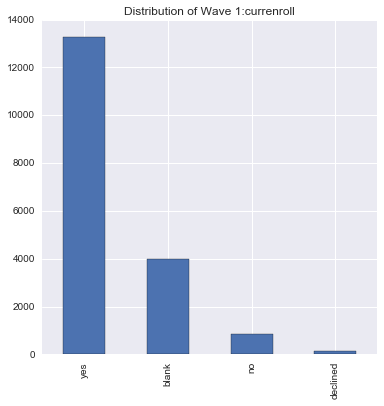

In [49]:
graph_outcm('currenroll')
outcomes.groupby(['currenroll']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,...,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
cnctadult,,,,,,,,,,,,,,,,,,,,,
blank,3984,3984,3984,3984,3984,3984,3984,3984,3984,3984,...,3984,3984,3984,3984,3984,3984,3984,3984,3984,3984
declined,266,266,266,266,266,266,266,266,266,266,...,266,266,266,266,266,266,266,266,266,266
no,789,789,789,789,789,789,789,789,789,789,...,789,789,789,789,789,789,789,789,789,789
yes,13214,13214,13214,13214,13214,13214,13214,13214,13214,13214,...,13214,13214,13214,13214,13214,13214,13214,13214,13214,13214


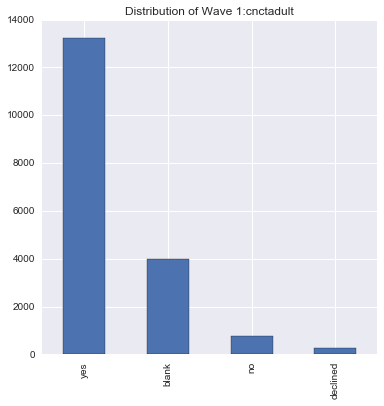

In [50]:
graph_outcm('cnctadult')
outcomes.groupby(['cnctadult']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,...,cnctadult,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
prescripin,,,,,,,,,,,,,,,,,,,,,
blank,3939,3939,3939,3939,3939,3939,3939,3939,3939,3939,...,3939,3939,3939,3939,3939,3939,3939,3939,3939,3939
declined,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
do not know,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
no,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
not applicable,12491,12491,12491,12491,12491,12491,12491,12491,12491,12491,...,12491,12491,12491,12491,12491,12491,12491,12491,12491,12491
yes,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562,...,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562


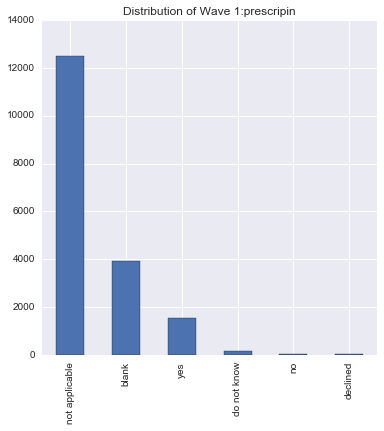

In [51]:
graph_outcm('prescripin')
outcomes.groupby(['prescripin']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,...,cnctadult,prescripin,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
homeless,,,,,,,,,,,,,,,,,,,,,
blank,3989,3989,3989,3989,3989,3989,3989,3989,3989,3989,...,3989,3989,3989,3989,3989,3989,3989,3989,3989,3989
declined,270,270,270,270,270,270,270,270,270,270,...,270,270,270,270,270,270,270,270,270,270
no,11551,11551,11551,11551,11551,11551,11551,11551,11551,11551,...,11551,11551,11551,11551,11551,11551,11551,11551,11551,11551
yes,2443,2443,2443,2443,2443,2443,2443,2443,2443,2443,...,2443,2443,2443,2443,2443,2443,2443,2443,2443,2443


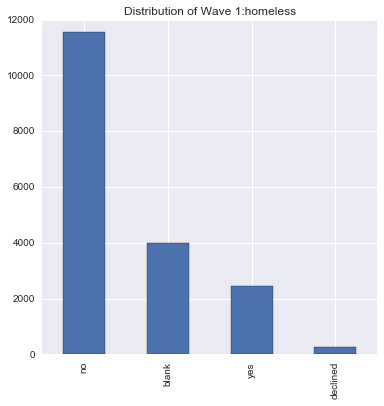

In [52]:
graph_outcm('homeless')
outcomes.groupby(['homeless']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,...,cnctadult,prescripin,homeless,incarc,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
subabuse,,,,,,,,,,,,,,,,,,,,,
blank,3986,3986,3986,3986,3986,3986,3986,3986,3986,3986,...,3986,3986,3986,3986,3986,3986,3986,3986,3986,3986
declined,259,259,259,259,259,259,259,259,259,259,...,259,259,259,259,259,259,259,259,259,259
no,10277,10277,10277,10277,10277,10277,10277,10277,10277,10277,...,10277,10277,10277,10277,10277,10277,10277,10277,10277,10277
yes,3731,3731,3731,3731,3731,3731,3731,3731,3731,3731,...,3731,3731,3731,3731,3731,3731,3731,3731,3731,3731


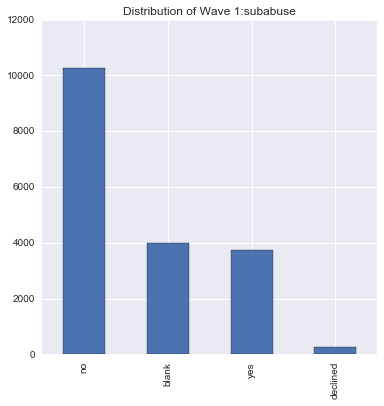

In [53]:
graph_outcm('subabuse')
outcomes.groupby(['subabuse']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,...,cnctadult,prescripin,homeless,subabuse,children,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
incarc,,,,,,,,,,,,,,,,,,,,,
blank,3989,3989,3989,3989,3989,3989,3989,3989,3989,3989,...,3989,3989,3989,3989,3989,3989,3989,3989,3989,3989
declined,248,248,248,248,248,248,248,248,248,248,...,248,248,248,248,248,248,248,248,248,248
no,9620,9620,9620,9620,9620,9620,9620,9620,9620,9620,...,9620,9620,9620,9620,9620,9620,9620,9620,9620,9620
yes,4396,4396,4396,4396,4396,4396,4396,4396,4396,4396,...,4396,4396,4396,4396,4396,4396,4396,4396,4396,4396


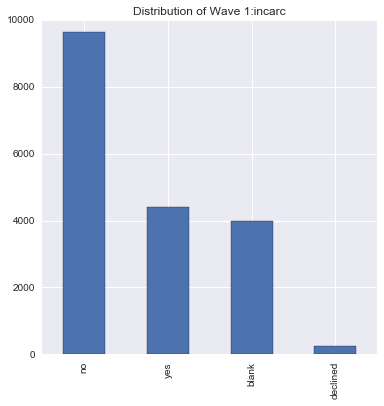

In [54]:
graph_outcm('incarc')
outcomes.groupby(['incarc']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,...,cnctadult,prescripin,homeless,subabuse,incarc,marriage,medicaid,othrhlthin,medicalin,mentlhlthin
children,,,,,,,,,,,,,,,,,,,,,
blank,3986,3986,3986,3986,3986,3986,3986,3986,3986,3986,...,3986,3986,3986,3986,3986,3986,3986,3986,3986,3986
declined,206,206,206,206,206,206,206,206,206,206,...,206,206,206,206,206,206,206,206,206,206
no,13408,13408,13408,13408,13408,13408,13408,13408,13408,13408,...,13408,13408,13408,13408,13408,13408,13408,13408,13408,13408
yes,653,653,653,653,653,653,653,653,653,653,...,653,653,653,653,653,653,653,653,653,653


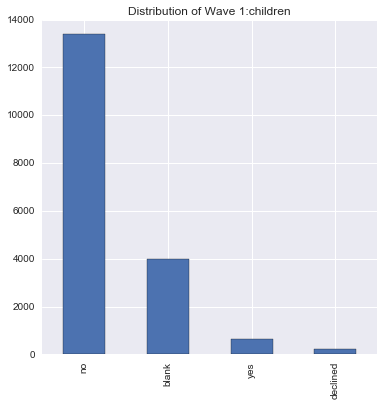

In [55]:
graph_outcm('children')
outcomes.groupby(['children']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,...,cnctadult,prescripin,homeless,subabuse,incarc,children,medicaid,othrhlthin,medicalin,mentlhlthin
marriage,,,,,,,,,,,,,,,,,,,,,
blank,3932,3932,3932,3932,3932,3932,3932,3932,3932,3932,...,3932,3932,3932,3932,3932,3932,3932,3932,3932,3932
declined,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
no,611,611,611,611,611,611,611,611,611,611,...,611,611,611,611,611,611,611,611,611,611
not applicable,13664,13664,13664,13664,13664,13664,13664,13664,13664,13664,...,13664,13664,13664,13664,13664,13664,13664,13664,13664,13664
yes,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


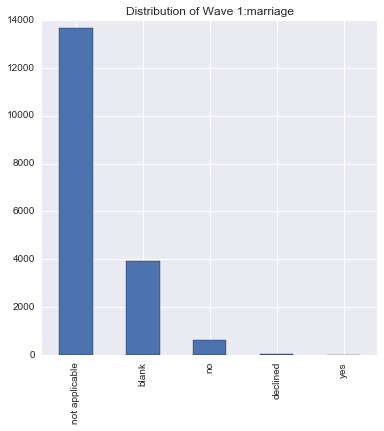

In [56]:
graph_outcm('marriage')
outcomes.groupby(['marriage']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,...,cnctadult,prescripin,homeless,subabuse,incarc,children,marriage,othrhlthin,medicalin,mentlhlthin
medicaid,,,,,,,,,,,,,,,,,,,,,
blank,3987,3987,3987,3987,3987,3987,3987,3987,3987,3987,...,3987,3987,3987,3987,3987,3987,3987,3987,3987,3987
declined,207,207,207,207,207,207,207,207,207,207,...,207,207,207,207,207,207,207,207,207,207
do not know,962,962,962,962,962,962,962,962,962,962,...,962,962,962,962,962,962,962,962,962,962
no,882,882,882,882,882,882,882,882,882,882,...,882,882,882,882,882,882,882,882,882,882
yes,12215,12215,12215,12215,12215,12215,12215,12215,12215,12215,...,12215,12215,12215,12215,12215,12215,12215,12215,12215,12215


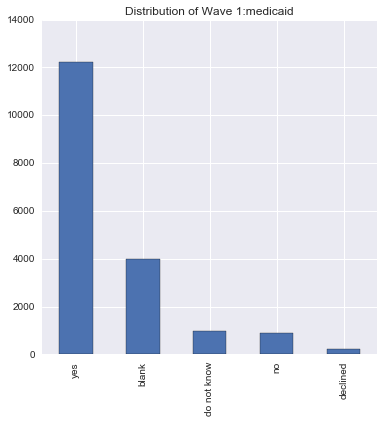

In [57]:
graph_outcm('medicaid')
outcomes.groupby(['medicaid']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,...,cnctadult,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,medicalin,mentlhlthin
othrhlthin,,,,,,,,,,,,,,,,,,,,,
blank,4007,4007,4007,4007,4007,4007,4007,4007,4007,4007,...,4007,4007,4007,4007,4007,4007,4007,4007,4007,4007
declined,224,224,224,224,224,224,224,224,224,224,...,224,224,224,224,224,224,224,224,224,224
do not know,1921,1921,1921,1921,1921,1921,1921,1921,1921,1921,...,1921,1921,1921,1921,1921,1921,1921,1921,1921,1921
no,9984,9984,9984,9984,9984,9984,9984,9984,9984,9984,...,9984,9984,9984,9984,9984,9984,9984,9984,9984,9984
yes,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,...,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117


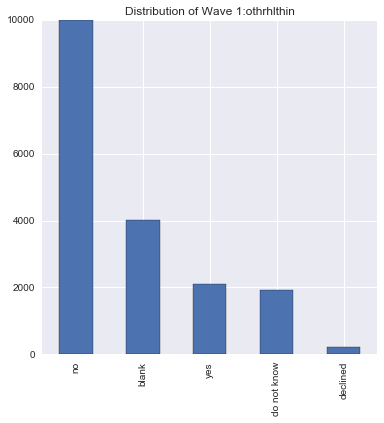

In [58]:
graph_outcm('othrhlthin')
outcomes.groupby(['othrhlthin']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,...,cnctadult,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,mentlhlthin
medicalin,,,,,,,,,,,,,,,,,,,,,
blank,3944,3944,3944,3944,3944,3944,3944,3944,3944,3944,...,3944,3944,3944,3944,3944,3944,3944,3944,3944,3944
declined,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
do not know,208,208,208,208,208,208,208,208,208,208,...,208,208,208,208,208,208,208,208,208,208
no,138,138,138,138,138,138,138,138,138,138,...,138,138,138,138,138,138,138,138,138,138
not applicable,12177,12177,12177,12177,12177,12177,12177,12177,12177,12177,...,12177,12177,12177,12177,12177,12177,12177,12177,12177,12177
yes,1758,1758,1758,1758,1758,1758,1758,1758,1758,1758,...,1758,1758,1758,1758,1758,1758,1758,1758,1758,1758


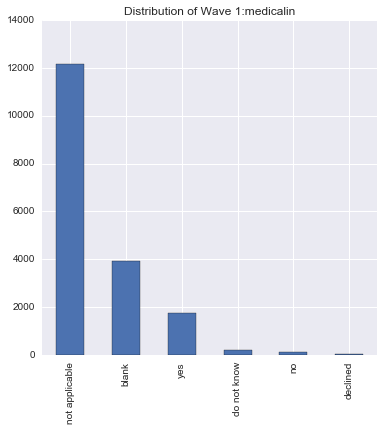

In [59]:
graph_outcm('medicalin')
outcomes.groupby(['medicalin']).count()

,pubfoodas,pubhousas,othrfinas,highedcert,currfte,currpte,emplysklls,socsecrty,educaid,pubfinas,...,cnctadult,prescripin,homeless,subabuse,incarc,children,marriage,medicaid,othrhlthin,medicalin
mentlhlthin,,,,,,,,,,,,,,,,,,,,,
blank,3941,3941,3941,3941,3941,3941,3941,3941,3941,3941,...,3941,3941,3941,3941,3941,3941,3941,3941,3941,3941
declined,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
do not know,286,286,286,286,286,286,286,286,286,286,...,286,286,286,286,286,286,286,286,286,286
no,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
not applicable,12489,12489,12489,12489,12489,12489,12489,12489,12489,12489,...,12489,12489,12489,12489,12489,12489,12489,12489,12489,12489
yes,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,...,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451


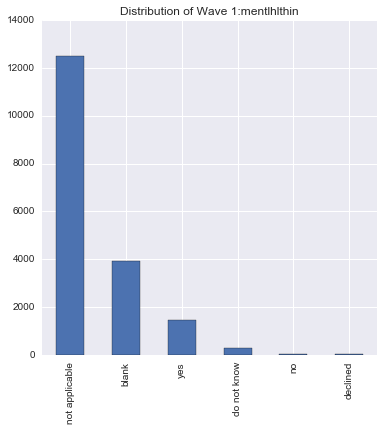

In [60]:
graph_outcm('mentlhlthin')
outcomes.groupby(['mentlhlthin']).count()

____________________________________________________________________________________________________________

# Distributions of Info

In [61]:
info = cohort_2[['wave','RepDate_outcomes','samplestate','insample','baseline','fy14cohort','elig19','outcmrpt',\
                 'outcmdte','outcmfcs','responded','FY','RepDate_services','FCStatSv']]

info.describe(include='all')

,wave,RepDate_outcomes,samplestate,insample,baseline,fy14cohort,elig19,outcmrpt,outcmdte,outcmfcs,responded,FY,RepDate_services,FCStatSv
count,18253,18253,18253,18253,18253,18253,18253,18253,18253,18253,18253.000000,18253.0,18253,18253.000000
unique,1,3,2,3,1,2,2,10,413,2,NaN,NaN,2,NaN
top,Age 17 Baseline Survey,2014-03-01 00:00:00,no,Not a Sample State,yes,yes,yes,participated,1999-01-01 00:00:00,yes,NaN,NaN,2014-09-01 00:00:00,NaN
freq,18253,9228,12853,12853,18253,13643,11442,14365,1323,17723,NaN,NaN,9715,NaN
first,NaN,2014-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1999-01-01 00:00:00,NaN,NaN,NaN,2014-03-01 00:00:00,NaN
last,NaN,2015-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-01 00:00:00,NaN,NaN,NaN,2014-09-01 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.781680,2014.0,NaN,0.947844
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.413117,0.0,NaN,0.222347
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2014.0,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2014.0,NaN,1.000000


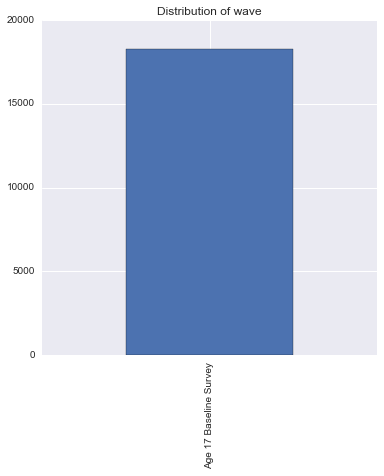

In [62]:
def graph_info(column):
    dist = info[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of " + str(column), figsize=(6,6))

graph_info('wave')

,wave,RepDate_outcomes,insample,baseline,fy14cohort,elig19,outcmrpt,outcmdte,outcmfcs,responded,FY,RepDate_services,FCStatSv
samplestate,,,,,,,,,,,,,
no,12853,12853,12853,12853,12853,12853,12853,12853,12853,12853,12853,12853,12853
yes,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400,5400


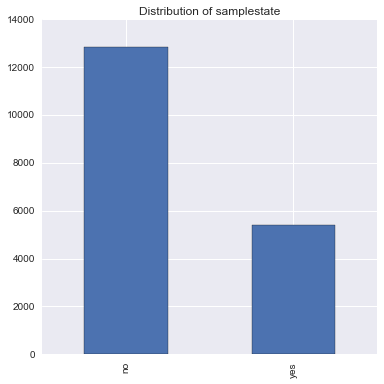

In [65]:
graph_info('samplestate')
info.groupby(['samplestate']).count()

,wave,RepDate_outcomes,samplestate,baseline,fy14cohort,elig19,outcmrpt,outcmdte,outcmfcs,responded,FY,RepDate_services,FCStatSv
insample,,,,,,,,,,,,,
Not a Sample State,12853,12853,12853,12853,12853,12853,12853,12853,12853,12853,12853,12853,12853
no,3226,3226,3226,3226,3226,3226,3226,3226,3226,3226,3226,3226,3226
yes,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174


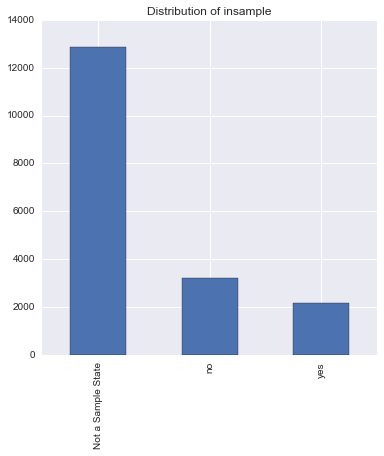

In [66]:
graph_info('insample')
info.groupby(['insample']).count()

,wave,RepDate_outcomes,samplestate,insample,fy14cohort,elig19,outcmrpt,outcmdte,outcmfcs,responded,FY,RepDate_services,FCStatSv
baseline,,,,,,,,,,,,,
yes,18253,18253,18253,18253,18253,18253,18253,18253,18253,18253,18253,18253,18253


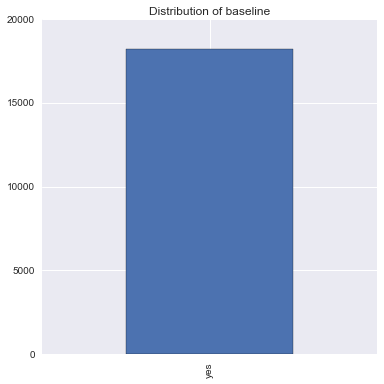

In [67]:
graph_info('baseline')
info.groupby(['baseline']).count()

,wave,RepDate_outcomes,samplestate,insample,baseline,elig19,outcmrpt,outcmdte,outcmfcs,responded,FY,RepDate_services,FCStatSv
fy14cohort,,,,,,,,,,,,,
no,4610,4610,4610,4610,4610,4610,4610,4610,4610,4610,4610,4610,4610
yes,13643,13643,13643,13643,13643,13643,13643,13643,13643,13643,13643,13643,13643


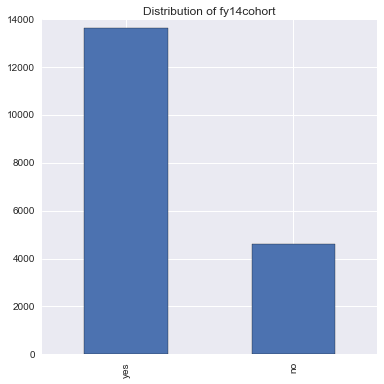

In [68]:
graph_info('fy14cohort')
info.groupby(['fy14cohort']).count()

,wave,RepDate_outcomes,samplestate,insample,baseline,fy14cohort,outcmrpt,outcmdte,outcmfcs,responded,FY,RepDate_services,FCStatSv
elig19,,,,,,,,,,,,,
no,6811,6811,6811,6811,6811,6811,6811,6811,6811,6811,6811,6811,6811
yes,11442,11442,11442,11442,11442,11442,11442,11442,11442,11442,11442,11442,11442


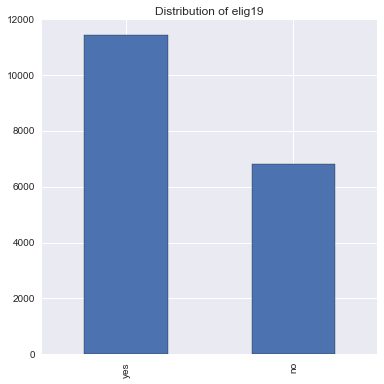

In [69]:
graph_info('elig19')
info.groupby(['elig19']).count()

,wave,RepDate_outcomes,samplestate,insample,baseline,fy14cohort,elig19,outcmdte,outcmfcs,responded,FY,RepDate_services,FCStatSv
outcmrpt,,,,,,,,,,,,,
blank,60,60,60,60,60,60,60,60,60,60,60,60,60
death,1,1,1,1,1,1,1,1,1,1,1,1,1
declined,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350
incapacitated,266,266,266,266,266,266,266,266,266,266,266,266,266
incarcerated,225,225,225,225,225,225,225,225,225,225,225,225,225
not in sample,2,2,2,2,2,2,2,2,2,2,2,2,2
parent declined,18,18,18,18,18,18,18,18,18,18,18,18,18
participated,14365,14365,14365,14365,14365,14365,14365,14365,14365,14365,14365,14365,14365
runaway or missing,607,607,607,607,607,607,607,607,607,607,607,607,607


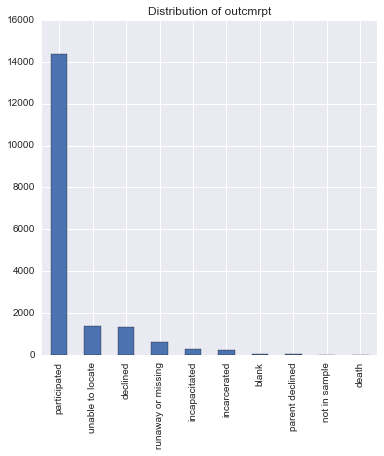

In [71]:
graph_info('outcmrpt')
info.groupby(['outcmrpt']).count()

,wave,RepDate_outcomes,samplestate,insample,baseline,fy14cohort,elig19,outcmrpt,outcmdte,responded,FY,RepDate_services,FCStatSv
outcmfcs,,,,,,,,,,,,,
no,530,530,530,530,530,530,530,530,530,530,530,530,530
yes,17723,17723,17723,17723,17723,17723,17723,17723,17723,17723,17723,17723,17723


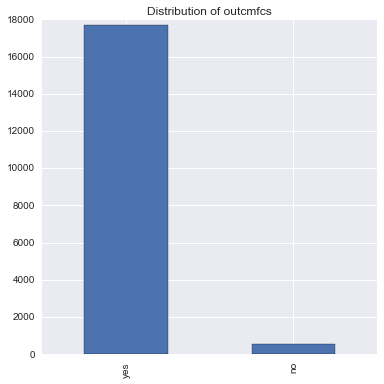

In [72]:
graph_info('outcmfcs')
info.groupby(['outcmfcs']).count()

,wave,RepDate_outcomes,samplestate,insample,baseline,fy14cohort,elig19,outcmrpt,outcmdte,outcmfcs,FY,RepDate_services,FCStatSv
responded,,,,,,,,,,,,,
0,3985,3985,3985,3985,3985,3985,3985,3985,3985,3985,3985,3985,3985
1,14268,14268,14268,14268,14268,14268,14268,14268,14268,14268,14268,14268,14268


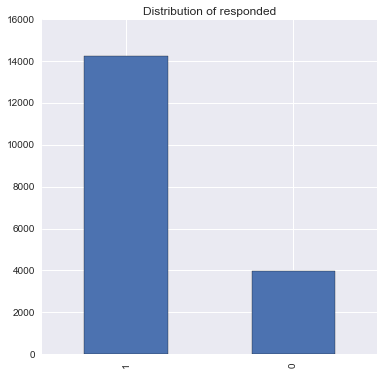

In [73]:
graph_info('responded')
info.groupby(['responded']).count()

,wave,RepDate_outcomes,samplestate,insample,baseline,fy14cohort,elig19,outcmrpt,outcmdte,outcmfcs,responded,RepDate_services,FCStatSv
FY,,,,,,,,,,,,,
2014,18253,18253,18253,18253,18253,18253,18253,18253,18253,18253,18253,18253,18253


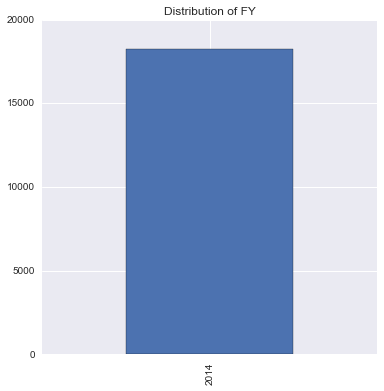

In [74]:
graph_info('FY')
info.groupby(['FY']).count()

,wave,RepDate_outcomes,samplestate,insample,baseline,fy14cohort,elig19,outcmrpt,outcmdte,outcmfcs,responded,FY,FCStatSv
RepDate_services,,,,,,,,,,,,,
2014-03-01,8538,8538,8538,8538,8538,8538,8538,8538,8538,8538,8538,8538,8538
2014-09-01,9715,9715,9715,9715,9715,9715,9715,9715,9715,9715,9715,9715,9715


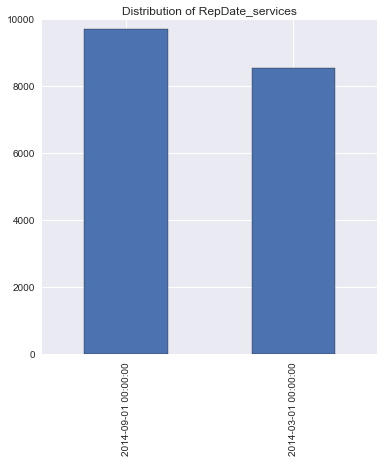

In [75]:
graph_info('RepDate_services')
info.groupby(['RepDate_services']).count()

,wave,RepDate_outcomes,samplestate,insample,baseline,fy14cohort,elig19,outcmrpt,outcmdte,outcmfcs,responded,FY,RepDate_services
FCStatSv,,,,,,,,,,,,,
0,952,952,952,952,952,952,952,952,952,952,952,952,952
1,17301,17301,17301,17301,17301,17301,17301,17301,17301,17301,17301,17301,17301


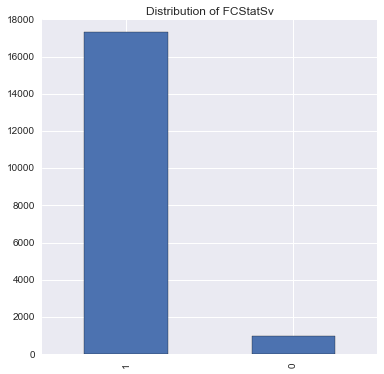

In [76]:
graph_info('FCStatSv')
info.groupby(['FCStatSv']).count()